In [1]:
# import fingerprint_enhancer # Load the library
import cv2
import os
import matplotlib.pyplot as plt
import random
import numpy as np
# folder = "E:\BTP\SOCOFing\Real"
folder = "E:\BTP\SOCOFing\Test"
# alt_folder = "E:\BTP\SOCOFing\AltTest"
alt_folder = "E:\BTP\SOCOFing\Test"

In [2]:
SIFT_DATA = []
# sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()
for filename in os.listdir(folder):
 img = cv2.imread(os.path.join(folder,filename))
# plt.imshow(img,cmap='gray')
# img = fingerprint_enhancer.enhance_Fingerprint(img)

 keypoints_1, descriptors_1 = sift.detectAndCompute(img, None)

 SIFT_DATA.append([filename, keypoints_1, descriptors_1])

In [3]:
num = random.randint(0, len(os.listdir(alt_folder)))
# num = 1
sample_filename = os.listdir(alt_folder)[num]
sample_img = cv2.imread(os.path.join(alt_folder,sample_filename))
bestscore = 0
result = None
mp = None
results = []

The images on the left side is the image that is trying to be found. And the image on the right side is the image that the algorithm matches the left side image in database. In this code first all the feature points of the images are being extracted and are stored in a variable after that we are manually searching for the bestmatch. this taken O(n) time for one image.
### Matching images without any transformation. 

18 18
 Score: 100.0


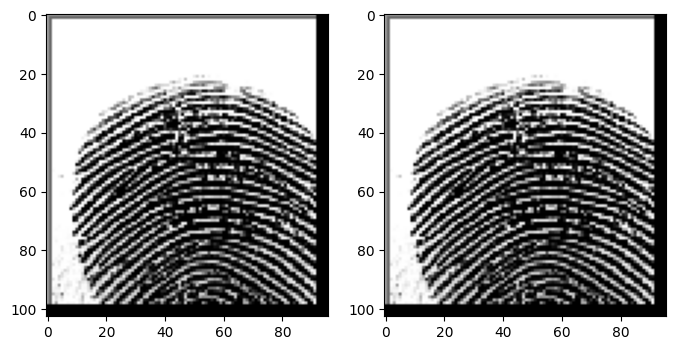

In [4]:
keypoints_2, descriptors_2 = sift.detectAndCompute(sample_img, None)
for i in range(len(SIFT_DATA)):
# print(result)
    matches = cv2.FlannBasedMatcher(dict(algorithm=1, trees=10),dict()).knnMatch(SIFT_DATA[i][2], descriptors_2, k=2)
    match_points = []
    for p, q in matches:
        if p.distance < 0.1*q.distance:
            match_points.append(p)
    
        keypoints = min(len(SIFT_DATA[i][1]), len(keypoints_2))
        results.append(len(match_points)/keypoints*100)

                                                                                 
        if len(match_points)/keypoints*100 > bestscore:
            bestscore = len(match_points)/keypoints*100
            result, mp = i, match_points
                                                                                 
# print(results)
print(str(result) + " " + str(num))
print(" Score: " + str(bestscore))
out = cv2.imread(os.path.join(folder, SIFT_DATA[result][0]))
f = plt.figure(figsize=(8,4))
sp = f.add_subplot(1, 2, 1)
plt.imshow(sample_img,cmap='gray')
sp = f.add_subplot(1, 2, 2)
plt.imshow(out,cmap='gray')

### Shifting Images and matching it

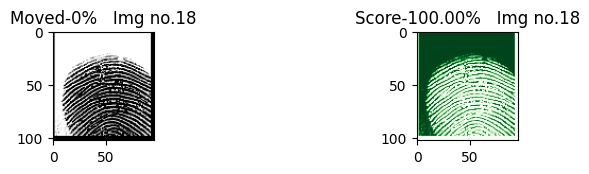

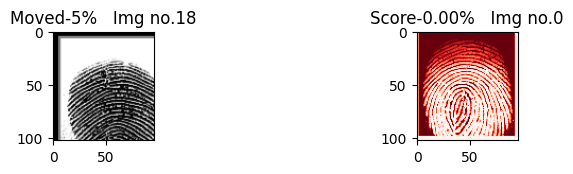

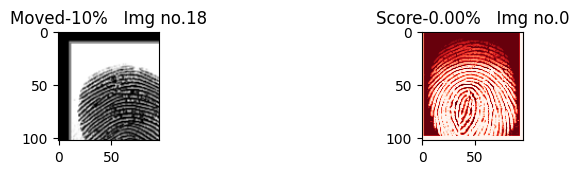

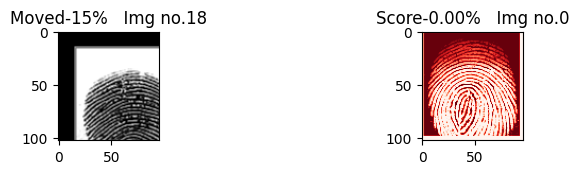

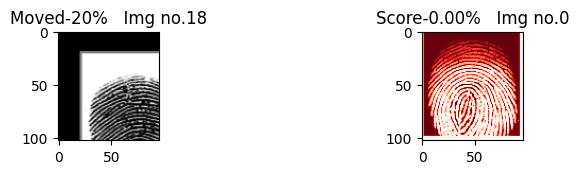

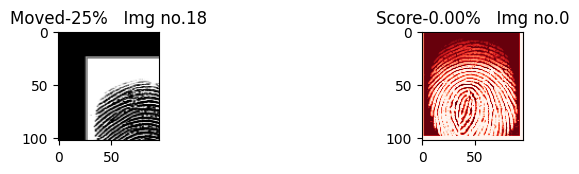

In [5]:
rows,cols = sample_img.shape[0], sample_img.shape[1]

for j in range(0, 26, 5):
    
    bestscore = -1
    result = None
    
    M = np.float32([[1,0,rows*(j/100)],[0,1,cols*(j/100)]])
    changed_img = cv2.warpAffine(sample_img,M,(cols,rows))
    keypoints_2, descriptors_2 = sift.detectAndCompute(changed_img, None)
    c_map = None 

    for i in range(len(SIFT_DATA)):
        matches = cv2.FlannBasedMatcher(dict(algorithm=1, trees=10),
                                        dict()).knnMatch(SIFT_DATA[i][2], descriptors_2, k=2)
        match_points = []
        for p, q in matches:
            if p.distance < 0.1*q.distance:
                match_points.append(p)

        keypoints = min(len(SIFT_DATA[i][1]), len(keypoints_2))
        if len(match_points)/keypoints*100 > bestscore:
            bestscore = len(match_points)/keypoints*100
            result = i
    
#     print(" Score: " + str(bestscore) + " " + str(result) + " " + str(num))
    if result==num : 
        c_map = 'Greens'
    else:
        c_map = 'Reds'
        
    out = cv2.imread(os.path.join(folder, SIFT_DATA[result][0]))
    f = plt.figure(figsize=(6,3))
    sp = f.add_subplot(1, 4, 1)
#     plt.imshow(cv2.cvtColor(changed_img, cv2.COLOR_BGR2GRAY),cmap=c_map)
    plt.title("Moved-{}%   Img no.{}".format(j, num))
    plt.imshow(changed_img ,cmap=c_map)
    sp = f.add_subplot(1, 4, 4)
    plt.title("Score-{0:1.2f}%   Img no.".format(bestscore)+str(result))
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2GRAY),cmap=c_map)

### Rotating Images and matching it

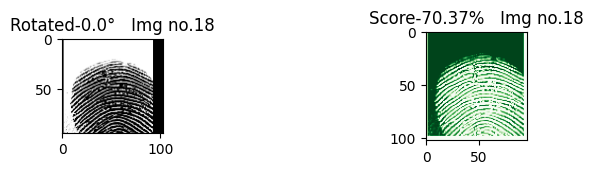

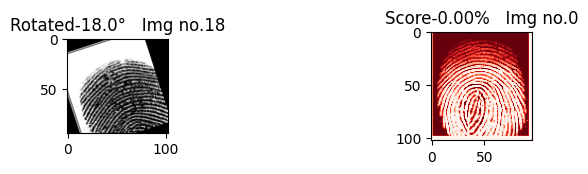

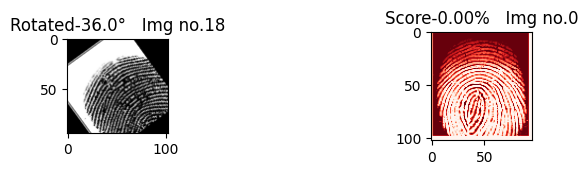

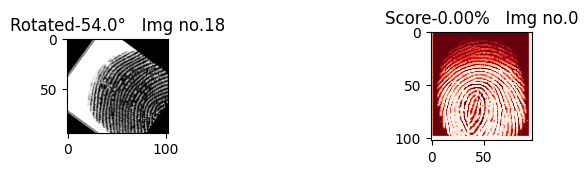

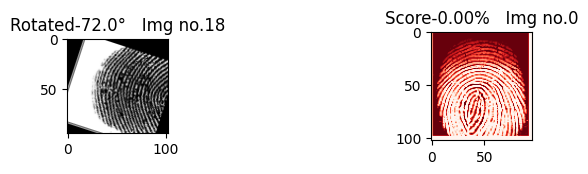

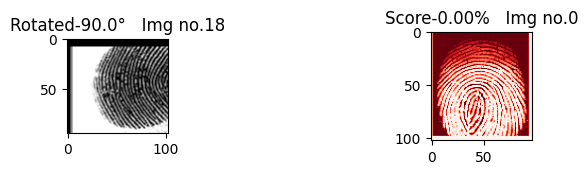

In [6]:
for j in range(0, 26, 5):
    
    bestscore = -1
    result = None
    
    M = np.float32([[1,0,rows*(j/100)],[0,1,cols*(j/100)]])
    rotate_matrix = cv2.getRotationMatrix2D(center=(rows/2, cols/2), angle=3.6*j, scale=1)
    changed_img = cv2.warpAffine(src=sample_img, M=rotate_matrix, dsize=(rows, cols))
#     changed_img = cv2.cvtColor(changed_img,cv2.COLOR_BGR2GRAY)
#     changed_img = image_enhancer.enhance(changed_img)
#     changed_img = np.array(changed_img, dtype=np.uint8)*255
    keypoints_2, descriptors_2 = sift.detectAndCompute(changed_img, None)
    c_map = None 

    for i in range(len(SIFT_DATA)):
        matches = cv2.FlannBasedMatcher(dict(algorithm=1, trees=10),
                                        dict()).knnMatch(SIFT_DATA[i][2], descriptors_2, k=2)
        match_points = []
        for p, q in matches:
            if p.distance < 0.1*q.distance:
                match_points.append(p)

        keypoints = min(len(SIFT_DATA[i][1]), len(keypoints_2))
        if len(match_points)/keypoints*100 > bestscore:
            bestscore = len(match_points)/keypoints*100
            result = i
    
#     print(" Score: " + str(bestscore) + " " + str(result) + " " + str(num))
    if result==num : 
        c_map = 'Greens'
    else:
        c_map = 'Reds'
        
    out = cv2.imread(os.path.join(folder, SIFT_DATA[result][0]))
    f = plt.figure(figsize=(6,3))
    sp = f.add_subplot(1, 4, 1)
#     plt.imshow(cv2.cvtColor(changed_img, cv2.COLOR_BGR2GRAY),cmap=c_map)
    plt.title("Rotated-{}°   Img no.{}".format(3.6*j, num))
    plt.imshow(changed_img ,cmap=c_map)
    sp = f.add_subplot(1, 4, 4)
    plt.title("Score-{0:1.2f}%   Img no.".format(bestscore)+str(result))
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2GRAY),cmap=c_map)